In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
# Replace 'advertising.csv' with the actual file path if necessary
data = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

# Explore the dataset
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


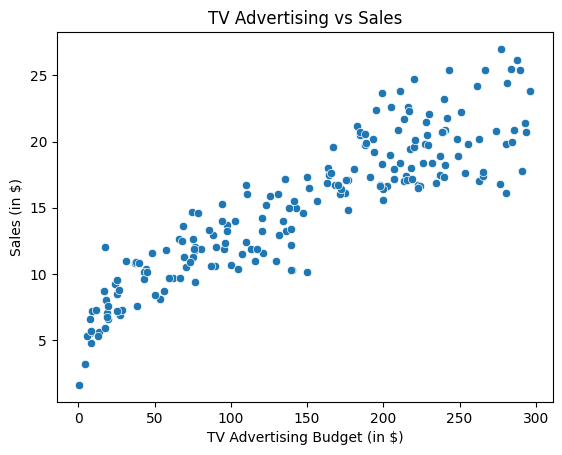

In [4]:
# Visualize the relationship between TV advertising and Sales
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget (in $)')
plt.ylabel('Sales (in $)')
plt.show()

In [5]:
# Select the feature (TV) and target (Sales)
X = data[['TV']]  # Feature matrix
y = data['Sales']  # Target vector

# Split the dataset into training and testing sets with test size as 20%. 
# Having an integer value in random_state makes the split reproducable in multiple runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 6.101072906773963
Root Mean Squared Error (RMSE): 2.470035001123256
R-squared (R²): 0.802561303423698


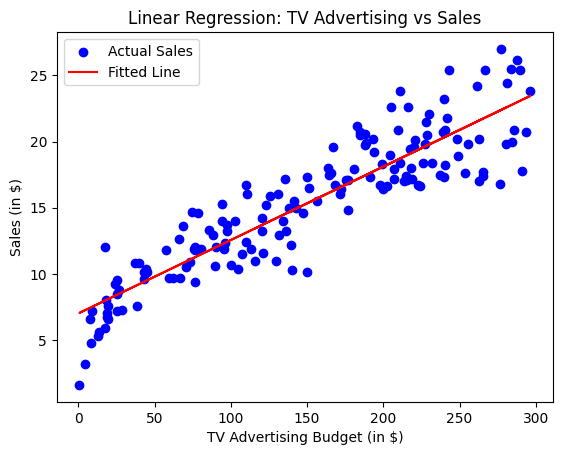

In [6]:
# Plot the linear regression line on the training data
plt.scatter(X_train, y_train, color='blue', label='Actual Sales')
plt.plot(X_train, model.predict(X_train), color='red', label='Fitted Line')
plt.title('Linear Regression: TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget (in $)')
plt.ylabel('Sales (in $)')
plt.legend()
plt.show()